```text
Pseudocode
Algorithm: hybrid_sort(A, S)

Input:
    A → array of elements
    S → threshold size for switching to insertion sort

Procedure:
    if length(A) <= S then
        insertion_sort(A)
        return A
    else
        if length(A) <= 1 then
            return A
        mid = length(A) // 2
        B1 = hybrid_sort(A[0:mid], S)
        B2 = hybrid_sort(A[mid:length(A)], S)
        return merge(B1, B2)


# **Algorithm Implementation**

In [1]:
import math, random, time, copy
from typing import List, Tuple
import numpy as np #generates random datasets efficiently
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

random.seed(42)
np.random.seed(22)  #so that random numbers are reproducible


In [2]:
class KeyComparisons: #to keep track of the key comparisions
    def __init__(self):
        self.numKeyComparisons = 0

    def isALargerThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a > b #if a>b keycomparisions += 1 and then returns the bool value

    def isALessThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a < b

    def isAEqualB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a == b

    def incrementKeyComparisons(self, v: int):
        self.numKeyComparisons += v

    def resetKeyComparisons(self):
        self.numKeyComparisons = 0
        
    def returnKeyComparisons(self):
        return self.numKeyComparisons


In [3]:
#insertion sort
def insertionSort(arr, comparisonsObject):
    for i in range(1, len(arr)):
        currentElement = arr[i]
        j = i-1
        while j >= 0 and comparisonsObject.isALessThanB(currentElement, arr[j]): #if returns true swap the 2 elements
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = currentElement 
    return arr


In [4]:
#merge sort
def mergeSort(arr, comparisonsObject):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    arr[:mid] = mergeSort(arr[:mid], comparisonsObject)
    arr[mid:] = mergeSort(arr[mid:], comparisonsObject)
    arr = merge(arr[:mid], arr[mid:], comparisonsObject)
    return arr


In [5]:
#merge
def merge(arr1, arr2, comparisonsObject):
    i = j = 0
    sorted_arr = []
    while i != len(arr1) and j != len(arr2): #basically loop runs till both the lists have elements, loop breaks the moment 1 list has no more elements
        if comparisonsObject.isALessThanB(arr1[i], arr2[j]):
            sorted_arr.append(arr1[i])
            i += 1
        else:
            sorted_arr.append(arr2[j])
            j += 1
    while i != len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    while j != len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    return sorted_arr


In [6]:
#hybrid sort
def hybridSort(arr,S, comparisonsObject):
    if len(arr) <= 1:
        return arr
    if len(arr) > S:
        m = len(arr)//2
        arr[:m] = hybridSort(arr[:m],S, comparisonsObject)
        arr[m:] = hybridSort(arr[m:], S, comparisonsObject)
        arr = merge(arr[:m], arr[m:], comparisonsObject)
        return arr
    else:
        arr = insertionSort(arr, comparisonsObject)
        return arr


In [7]:
#testing hybrid sort vs merge sort on simple array
array1 = [44,97,96,45,66,87,45,32,8,5,34,76,90,45,32,1,6,8,5,76,74,87,95]
comparisonsObject = KeyComparisons()   

print(hybridSort(array1,3, comparisonsObject))
print("Total comparisons(Hybrid Sort):", comparisonsObject.numKeyComparisons)
print(mergeSort(array1, comparisonsObject))
print("Total comparisons(Merge Sort):", comparisonsObject.numKeyComparisons)


[1, 5, 5, 6, 8, 8, 32, 32, 34, 44, 45, 45, 45, 66, 74, 76, 76, 87, 87, 90, 95, 96, 97]
Total comparisons(Hybrid Sort): 75
[1, 5, 5, 6, 8, 8, 32, 32, 34, 44, 45, 45, 45, 66, 74, 76, 76, 87, 87, 90, 95, 96, 97]
Total comparisons(Merge Sort): 134


# **Theoretical estimates**

In [8]:
def theory_best(n: int, S: int) -> float:
    levels = max(0.0, math.log2(max(1, n) / max(1, S)))
    merges = 0.5 * n * levels
    leaves = n - n / S
    return merges + leaves

def theory_avg(n: int, S: int) -> float:
    levels = max(0.0, math.log2(max(1, n) / max(1, S)))
    merges = n * levels
    leaves = n * (S - 1) / 4.0
    return merges + leaves

def theory_worst(n: int, S: int) -> float:
    levels = max(0.0, math.log2(max(1, n) / max(1, S)))
    merges = n * levels
    leaves = n * (S - 1) / 2.0
    return merges + leaves


# **Generate input data**

In [9]:
#builds an array of test sizes from 1000 to 10M
inputDataSizes = []
for i in range(10):
    inputDataSizes.append((i+1) * 1000)      # 1k, 2k, ...
    inputDataSizes.append((i+1) * 10000)     # 10k, 20k, ...
    inputDataSizes.append((i+1) * 100000)    # 100k, ...
    inputDataSizes.append((i+1) * 1000000)   # 1M, ...

inputDataSizes = sorted(set(inputDataSizes)) #removes the duplicates and sorts them in order

#actual datasets generation
inputData = []
for s in inputDataSizes:
    data = np.random.randint(1, s+1, size=s)
    inputData.append(data)


In [10]:
#testing to check all the data sizes generated
print(inputDataSizes)


[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [11]:
#to verify that the datasets generated are correctly generated
for i in range(len(inputData)):
    print("Array Size: ", len(inputData[i]))
    print("Min of this array:" , min(inputData[i]))
    print("Max of this array:" , max(inputData[i]))
    print()
    

Array Size:  1000
Min of this array: 1
Max of this array: 1000

Array Size:  2000
Min of this array: 3
Max of this array: 2000

Array Size:  3000
Min of this array: 2
Max of this array: 2998

Array Size:  4000
Min of this array: 2
Max of this array: 4000

Array Size:  5000
Min of this array: 2
Max of this array: 5000

Array Size:  6000
Min of this array: 1
Max of this array: 6000

Array Size:  7000
Min of this array: 1
Max of this array: 7000

Array Size:  8000
Min of this array: 1
Max of this array: 8000

Array Size:  9000
Min of this array: 3
Max of this array: 8999

Array Size:  10000
Min of this array: 1
Max of this array: 10000

Array Size:  20000
Min of this array: 1
Max of this array: 20000

Array Size:  30000
Min of this array: 2
Max of this array: 29999

Array Size:  40000
Min of this array: 1
Max of this array: 40000

Array Size:  50000
Min of this array: 3
Max of this array: 50000

Array Size:  60000
Min of this array: 1
Max of this array: 59999

Array Size:  70000
Min of th

# **Fixed s, vary n**

In [12]:
#(i) emperical values for fixed s, vary n
thresholdValueS = 10  # fixed threshold for this experiment
comparisonsObject = KeyComparisons()

for idx, array in enumerate(inputData, start=1): #index number so that we can print progress
    print(f"\nProcessing array {idx}/{len(inputData)}...", flush=True)
    
    copyOfArray = copy.deepcopy(array) #makes a deep copy so that sorting doesn't change the og
    arrayLength = len(copyOfArray)
    print(f"Current Array Size: {arrayLength}", flush=True) 
    
    startTimestamp = time.time()
    hybridSort(copyOfArray, thresholdValueS, comparisonsObject)
    endingTimestamp = time.time()
    
    numKeyComparisons1 = comparisonsObject.returnKeyComparisons()
    elapsedTime = endingTimestamp - startTimestamp
    
    # print results for this dataset
    print(f"Key Comparisons: {numKeyComparisons1}", flush=True)
    print(f"Time Elapsed: {elapsedTime:.6f} seconds", flush=True)
    
    comparisonsObject.resetKeyComparisons()



Processing array 1/37...
Current Array Size: 1000
Key Comparisons: 9073
Time Elapsed: 0.011571 seconds

Processing array 2/37...
Current Array Size: 2000
Key Comparisons: 20340
Time Elapsed: 0.016327 seconds

Processing array 3/37...
Current Array Size: 3000
Key Comparisons: 31489
Time Elapsed: 0.027379 seconds

Processing array 4/37...
Current Array Size: 4000
Key Comparisons: 44418
Time Elapsed: 0.035190 seconds

Processing array 5/37...
Current Array Size: 5000
Key Comparisons: 58537
Time Elapsed: 0.049427 seconds

Processing array 6/37...
Current Array Size: 6000
Key Comparisons: 69185
Time Elapsed: 0.056590 seconds

Processing array 7/37...
Current Array Size: 7000
Key Comparisons: 82718
Time Elapsed: 0.068115 seconds

Processing array 8/37...
Current Array Size: 8000
Key Comparisons: 97035
Time Elapsed: 0.081425 seconds

Processing array 9/37...
Current Array Size: 9000
Key Comparisons: 111670
Time Elapsed: 0.091231 seconds

Processing array 10/37...
Current Array Size: 10000
Ke

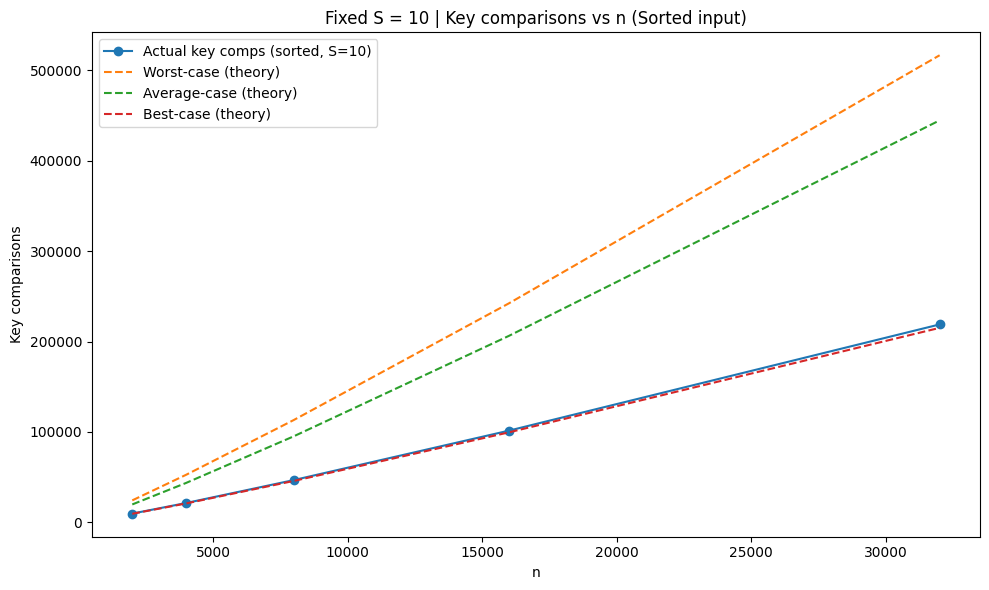

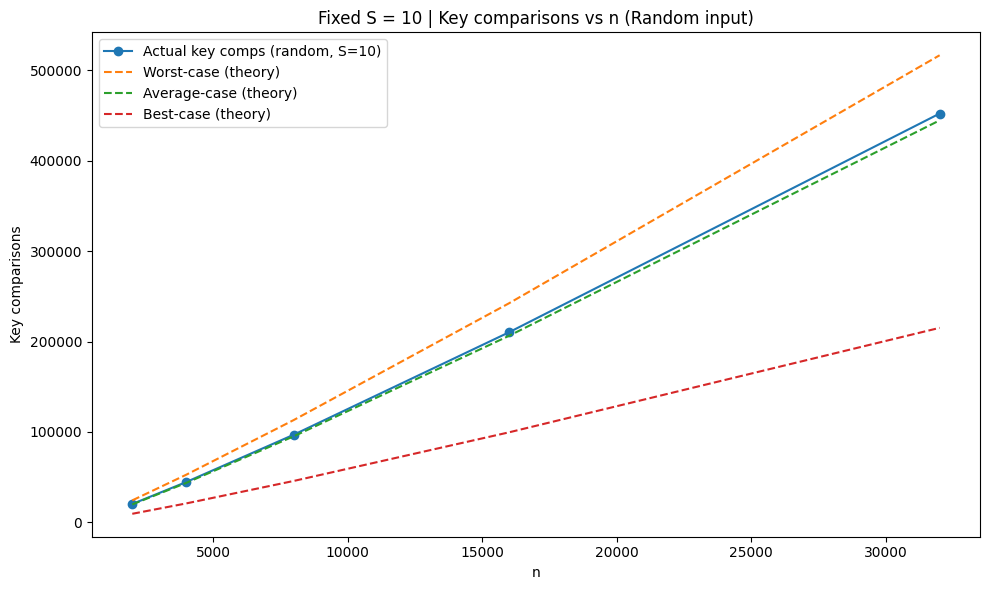

In [13]:
# (i) graoh for fixed s, vary n
def plot_fixed_S_vary_n(S: int, n_values, kind: str, outfile: str):
    # gather empirical comparisons
    actual = []
    for n in n_values:
        arr = list(range(n))
        if kind == "random":
            random.shuffle(arr)
        compsObj = KeyComparisons()
        hybridSort(arr.copy(), S, compsObj)
        actual.append(compsObj.returnKeyComparisons())

    # theory curves
    worst = [theory_worst(n, S) for n in n_values]
    avg   = [theory_avg(n, S)   for n in n_values]
    best  = [theory_best(n, S)  for n in n_values]

    plt.figure(figsize=(10, 6))
    plt.plot(n_values, actual, marker='o', linestyle='-', label=f"Actual key comps ({kind}, S={S})")
    plt.plot(n_values, worst, linestyle='--', label="Worst-case (theory)")
    plt.plot(n_values, avg,   linestyle='--', label="Average-case (theory)")
    plt.plot(n_values, best,  linestyle='--', label="Best-case (theory)")
    plt.title(f"Fixed S = {S} | Key comparisons vs n ({kind.capitalize()} input)")
    plt.xlabel("n")
    plt.ylabel("Key comparisons")
    plt.legend()
    plt.tight_layout()
    plt.savefig(outfile, dpi=150)
    plt.show()

# Example run
S_fixed = 10
n_vals  = [2000, 4000, 8000, 16000, 32000]

plot_fixed_S_vary_n(S_fixed, n_vals, "sorted", "fixed_S_sorted.png")
plot_fixed_S_vary_n(S_fixed, n_vals, "random", "fixed_S_random.png")


# **Fixed n, vary s**

In [14]:
# (ii) emperical values fixed n, vary s
n_fixed = 60000
S_values = list(range(1, 97, 4))  # test thresholds 1..96 step 4

base_array = np.random.randint(1, n_fixed+1, size=n_fixed).tolist()

for S in S_values:
    compsObj = KeyComparisons()
    copyArr = base_array.copy()
    
    startTimestamp = time.time()
    hybridSort(copyArr, S, compsObj)
    endingTimestamp = time.time()
    
    comps = compsObj.returnKeyComparisons()
    elapsed = endingTimestamp - startTimestamp
    
    print(f"S = {S:2d} | Key Comparisons = {comps} | Time Elapsed = {elapsed:.6f} sec")


S =  1 | Key Comparisons = 876989 | Time Elapsed = 0.445527 sec
S =  5 | Key Comparisons = 879873 | Time Elapsed = 0.379515 sec
S =  9 | Key Comparisons = 898719 | Time Elapsed = 0.368868 sec
S = 13 | Key Comparisons = 898719 | Time Elapsed = 0.380203 sec
S = 17 | Key Comparisons = 963952 | Time Elapsed = 0.374806 sec
S = 21 | Key Comparisons = 963952 | Time Elapsed = 0.377736 sec
S = 25 | Key Comparisons = 963952 | Time Elapsed = 0.373996 sec
S = 29 | Key Comparisons = 1077445 | Time Elapsed = 0.388482 sec
S = 33 | Key Comparisons = 1130221 | Time Elapsed = 0.400838 sec
S = 37 | Key Comparisons = 1130221 | Time Elapsed = 0.401878 sec
S = 41 | Key Comparisons = 1130221 | Time Elapsed = 0.395113 sec
S = 45 | Key Comparisons = 1130221 | Time Elapsed = 0.395550 sec
S = 49 | Key Comparisons = 1130221 | Time Elapsed = 0.402157 sec
S = 53 | Key Comparisons = 1130221 | Time Elapsed = 0.395530 sec
S = 57 | Key Comparisons = 1130221 | Time Elapsed = 0.397856 sec
S = 61 | Key Comparisons = 15137

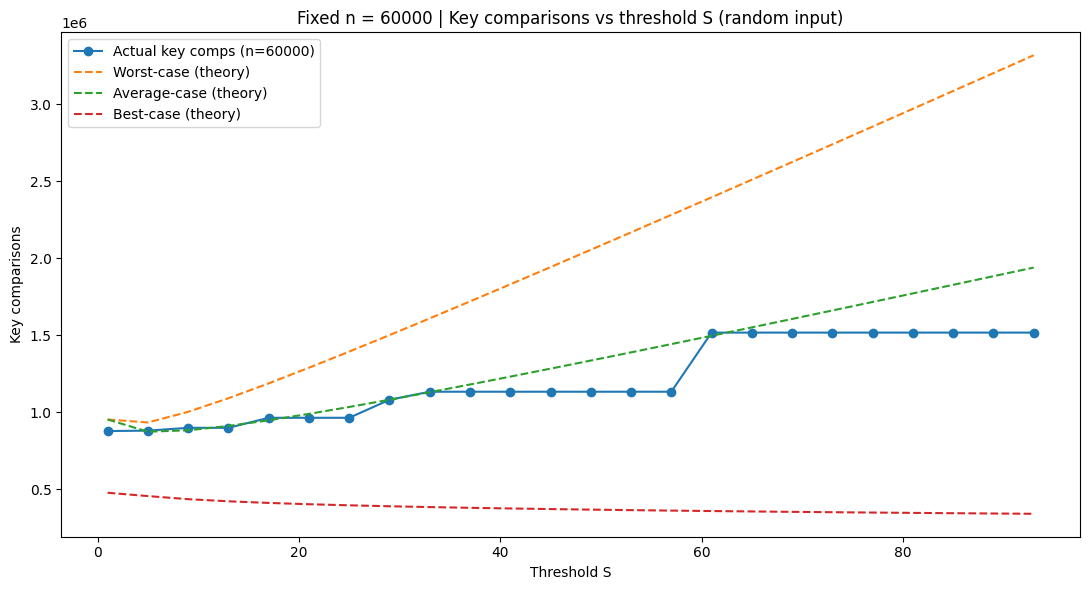

In [15]:
# (ii) graph fixed n, vary s 
def plot_fixed_n_vary_S(n: int, S_values, outfile: str):
    base = list(range(n))
    random.shuffle(base)

    actual = []
    for S in S_values:
        compsObj = KeyComparisons()
        hybridSort(base.copy(), S, compsObj)
        actual.append(compsObj.returnKeyComparisons())

    worst = [theory_worst(n, S) for S in S_values]
    avg   = [theory_avg(n, S)   for S in S_values]
    best  = [theory_best(n, S)  for S in S_values]

    plt.figure(figsize=(11, 6))
    plt.plot(S_values, actual, marker='o', linestyle='-', label=f"Actual key comps (n={n})")
    plt.plot(S_values, worst, linestyle='--', label="Worst-case (theory)")
    plt.plot(S_values, avg,   linestyle='--', label="Average-case (theory)")
    plt.plot(S_values, best,  linestyle='--', label="Best-case (theory)")
    plt.title(f"Fixed n = {n} | Key comparisons vs threshold S (random input)")
    plt.xlabel("Threshold S")
    plt.ylabel("Key comparisons")
    plt.legend()
    plt.tight_layout()
    plt.savefig(outfile, dpi=150)
    plt.show()

# Example run
n_fixed = 60000
S_vals  = list(range(1, 97, 4))
plot_fixed_n_vary_S(n_fixed, S_vals, "fixed_n_vary_S.png")


# **Optimal s by time across several n**

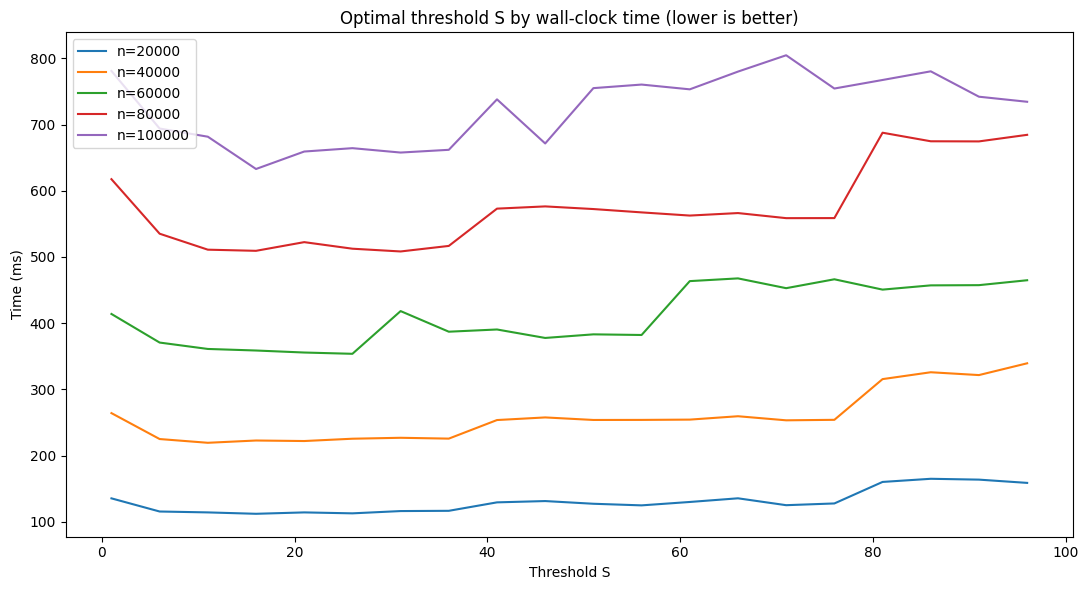

n,S,time_ms
20000,16,112.331400
40000,11,219.524900
60000,26,353.858200
80000,31,508.354800
100000,16,632.845200


In [16]:
# (iii) Optimal S by time across several n
def time_hybrid(arr, S) -> float:
    compsObj = KeyComparisons()
    a = arr.copy()  # copy so each run sorts identical data
    t0 = time.perf_counter()
    hybridSort(a, S, compsObj)
    return (time.perf_counter() - t0) * 1000.0  # ms

def plot_optimal_S_by_time(n_list, S_values, outfile: str):
    results = []
    plt.figure(figsize=(11, 6))
    for n in n_list:
        base = list(range(n))
        random.shuffle(base)
        times = []
        for S in S_values:
            dt = time_hybrid(base, S)
            times.append(dt)
            results.append((n, S, dt))
        plt.plot(S_values, times, label=f"n={n}")
    plt.title("Optimal threshold S by wall-clock time (lower is better)")
    plt.xlabel("Threshold S")
    plt.ylabel("Time (ms)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(outfile, dpi=150)
    plt.show()

    df = pd.DataFrame(results, columns=["n","S","time_ms"])
    best = df.loc[df.groupby("n")["time_ms"].idxmin()].sort_values("n")
    display(best.style.hide(axis='index'))
    return best

# Example run
n_list = [20000, 40000, 60000, 80000, 100000]
S_vals_time = list(range(1, 97, 5))
best_table = plot_optimal_S_by_time(n_list, S_vals_time, "optimal_S_time.png")
